### **_Business Objectives_**
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.   

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.   

**If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.**  

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.   

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


In [1]:
#%load_ext nb_black
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
loan_df = pd.read_csv("loan.csv")
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan


## Data Prepration

In [4]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
def nullPercentage(df):
    print(round((df.isnull().sum() / len(df.index) * 100), 2))

In [6]:
nullPercentage(loan_df)

id                                 0.000
member_id                          0.000
loan_amnt                          0.000
funded_amnt                        0.000
funded_amnt_inv                    0.000
term                               0.000
int_rate                           0.000
installment                        0.000
grade                              0.000
sub_grade                          0.000
emp_title                          6.190
emp_length                         2.710
home_ownership                     0.000
annual_inc                         0.000
verification_status                0.000
issue_d                            0.000
loan_status                        0.000
pymnt_plan                         0.000
url                                0.000
desc                              32.580
purpose                            0.000
title                              0.030
zip_code                           0.000
addr_state                         0.000
dti             

In [7]:
# Drop Column based on Null Percentage Criteria
temp_df = pd.DataFrame(round((loan_df.isnull().sum() / len(loan_df.index) * 100), 2))

column = (temp_df.loc[temp_df[0] > 7].index).tolist()

loan_df_clean = loan_df.drop(columns=column, axis=1)

nullPercentage(loan_df_clean)

id                           0.000
member_id                    0.000
loan_amnt                    0.000
funded_amnt                  0.000
funded_amnt_inv              0.000
term                         0.000
int_rate                     0.000
installment                  0.000
grade                        0.000
sub_grade                    0.000
emp_title                    6.190
emp_length                   2.710
home_ownership               0.000
annual_inc                   0.000
verification_status          0.000
issue_d                      0.000
loan_status                  0.000
pymnt_plan                   0.000
url                          0.000
purpose                      0.000
title                        0.030
zip_code                     0.000
addr_state                   0.000
dti                          0.000
delinq_2yrs                  0.000
earliest_cr_line             0.000
inq_last_6mths               0.000
open_acc                     0.000
pub_rec             

In [8]:
if len(loan_df_clean["id"].value_counts()) == len(loan_df_clean):
    print("There's no duplicate record in dataframe")

There's no duplicate record in dataframe


In [9]:
loan_df_clean["title"].value_counts()

Debt Consolidation                                                            2184
Debt Consolidation Loan                                                       1729
Personal Loan                                                                  659
Consolidation                                                                  517
debt consolidation                                                             505
Credit Card Consolidation                                                      356
Home Improvement                                                               356
Debt consolidation                                                             334
Small Business Loan                                                            328
Credit Card Loan                                                               317
Personal                                                                       308
Consolidation Loan                                                             255
Home

In [10]:
# Drop the Columns that will not be required for analysis

columns = [
    "zip_code",
    "pymnt_plan",
    "url",
    "addr_state",
    "earliest_cr_line",
    "initial_list_status",
    "last_pymnt_d",
    "collections_12_mths_ex_med",
    "policy_code",
    "application_type",
    "acc_now_delinq",
    "chargeoff_within_12_mths",
    "delinq_amnt",
    "tax_liens",
    "member_id",
    "id",
]

for column in columns:
    if column in loan_df_clean.columns.tolist():
        loan_df_clean = loan_df_clean.drop(column, axis=1)

loan_df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,Computer,27.650,0,1,3,0,13648,83.70%,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,171.620,May-16,0.000
1,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,bike,1.000,0,5,3,0,1687,9.40%,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,119.660,Sep-13,0.000
2,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.720,0,2,2,0,2956,98.50%,10,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,649.910,May-16,0.000
3,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,personel,20.000,0,1,10,0,5598,21%,37,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,357.480,Apr-16,0.000
4,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,other,Personal,17.940,0,0,15,0,27783,53.90%,38,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,67.790,May-16,0.000


In [11]:
for col in loan_df_clean.columns:
    if col not in (["loan_amnt"]):
        print("column : " + col)
        print(loan_df_clean[col].unique())
        print("")

column : funded_amnt
[ 5000  2500  2400 ...   800 13875 22350]

column : funded_amnt_inv
[4975. 2500. 2400. ...  200.   75.  150.]

column : term
[' 36 months' ' 60 months']

column : int_rate
['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '

## Data Cleaning

In [12]:
nullPercentage(loan_df_clean)

loan_amnt                 0.000
funded_amnt               0.000
funded_amnt_inv           0.000
term                      0.000
int_rate                  0.000
installment               0.000
grade                     0.000
sub_grade                 0.000
emp_title                 6.190
emp_length                2.710
home_ownership            0.000
annual_inc                0.000
verification_status       0.000
issue_d                   0.000
loan_status               0.000
purpose                   0.000
title                     0.030
dti                       0.000
delinq_2yrs               0.000
inq_last_6mths            0.000
open_acc                  0.000
pub_rec                   0.000
revol_bal                 0.000
revol_util                0.130
total_acc                 0.000
out_prncp                 0.000
out_prncp_inv             0.000
total_pymnt               0.000
total_pymnt_inv           0.000
total_rec_prncp           0.000
total_rec_int             0.000
total_re

In [13]:
# drop null rows
loan_df_clean = loan_df_clean.dropna()

## Data Description :

In [14]:
# Get Column and Data Type Info
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36493 entries, 1 to 39680
Data columns (total 37 columns):
loan_amnt                  36493 non-null int64
funded_amnt                36493 non-null int64
funded_amnt_inv            36493 non-null float64
term                       36493 non-null object
int_rate                   36493 non-null object
installment                36493 non-null float64
grade                      36493 non-null object
sub_grade                  36493 non-null object
emp_title                  36493 non-null object
emp_length                 36493 non-null object
home_ownership             36493 non-null object
annual_inc                 36493 non-null float64
verification_status        36493 non-null object
issue_d                    36493 non-null object
loan_status                36493 non-null object
purpose                    36493 non-null object
title                      36493 non-null object
dti                        36493 non-null float64
delinq_

In [15]:
# Get Overview of Data
loan_df_clean.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000,36493.000
mean,11303.408,11029.014,10595.849,326.087,69269.112,13.442,0.146,0.866,9.348,0.054,13454.454,22.236,52.379,52.127,12291.799,11822.561,9896.111,2300.616,1.298,93.774,11.780,2738.446,0.042
std,7435.229,7168.197,7072.904,207.436,63502.846,6.644,0.493,1.064,4.373,0.235,15694.254,11.377,379.544,378.138,9053.594,8915.927,7058.846,2629.039,7.060,685.599,141.264,4471.231,0.200
min,500.000,500.000,0.000,16.080,4000.000,0.000,0.000,0.000,2.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5600.000,5500.000,5000.000,168.860,42000.000,8.350,0.000,0.000,6.000,0.000,3826.000,14.000,0.000,0.000,5654.246,5395.110,4800.000,675.440,0.000,0.000,0.000,225.020,0.000
50%,10000.000,10000.000,9200.000,283.200,60000.000,13.540,0.000,1.000,9.000,0.000,9020.000,21.000,0.000,0.000,10083.720,9619.300,8075.000,1377.830,0.000,0.000,0.000,568.700,0.000
75%,15000.000,15000.000,14500.000,432.090,83000.000,18.690,0.000,1.000,12.000,0.000,17212.000,29.000,0.000,0.000,16679.597,16078.230,14000.000,2888.050,0.000,0.000,0.000,3449.470,0.000
max,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,44.000,4.000,149588.000,90.000,6311.470,6307.370,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,2.000


In [16]:
# Show Unique Value of Columns
for col in loan_df_clean.columns:
    if col not in (["loan_amnt"]):
        print("column : " + col)
        print(loan_df_clean[col].unique())
        print("")

column : funded_amnt
[ 2500 10000  3000 ...  1175   500   725]

column : funded_amnt_inv
[ 2500. 10000.  3000. ...   700.   600.   525.]

column : term
[' 60 months' ' 36 months']

column : int_rate
['15.27%' '13.49%' '12.69%' '7.90%' '15.96%' '18.64%' '14.65%' '9.91%'
 '10.65%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%' '8.90%'
 '7.51%' '6.62%' '19.91%' '17.27%' '21.28%' '17.58%' '21.67%' '19.42%'
 '22.06%' '20.89%' '18.25%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '15.99%' '16.49%' '6.99%' '12.99%'
 '15.23%' '14.79%' '8.49%' '5.42%' '17.49%' '10.59%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%' '21.82%' '19.79%'
 '18.49%' '13.

## Data Analysis

Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. 

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 
1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)  
2. loan characteristics (amount of loan, interest rate, purpose of loan etc.)   
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, going forward, we will use only the other two types of variables.

## Data Conversion and Dervied Variables

In [17]:
# Int_rate Can be converted to float for more insights
loan_df_clean.int_rate = (
    loan_df_clean.int_rate.str.rstrip("%").astype(float)
    if loan_df_clean.int_rate.dtype != float
    else loan_df_clean.int_rate
)

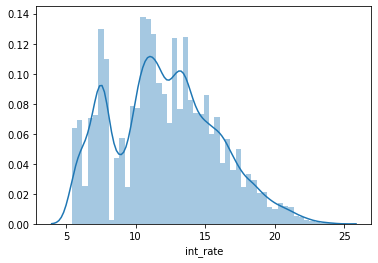

In [18]:
sns.distplot(loan_df_clean["int_rate"])

In [19]:
loan_df_clean["int_rate"].describe()

count   36493.000
mean       12.077
std         3.735
min         5.420
25%         9.320
50%        11.860
75%        14.650
max        24.400
Name: int_rate, dtype: float64

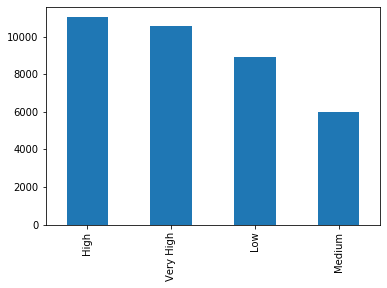

In [20]:
# Create Int_rate Binning into Two Category - "Low", "Medium", "High" & "Very High"
loan_df_clean["int_rate_interval"] = pd.cut(
    x=loan_df_clean["int_rate"],
    bins=[0, 9, 11, 14, 25],
    include_lowest=True,
    labels=["Low", "Medium", "High", "Very High"],
)
loan_df_clean["int_rate_interval"].value_counts().plot("bar")

In [21]:
# Derive Month and year Column
loan_df_clean["issue_d"] = pd.to_datetime(loan_df_clean["issue_d"], format="%b-%y")
loan_df_clean["issue_month"] = loan_df_clean["issue_d"].dt.month_name(locale="English")
loan_df_clean["issue_year"] = loan_df_clean["issue_d"].dt.year

In [22]:
# consider only data that are having loan-status as Full_Paid or Charged_Off
## Derived Column - loan_status_rate : that will give us defaulter rate
loan_df_clean = loan_df_clean.loc[loan_df_clean["loan_status"] != "Current"]

loan_df_clean["defaulter_rate"] = loan_df_clean["loan_status"].apply(
    lambda x: 0 if x == "Fully Paid" else 1
)

In [23]:
# Drop Consumer Variables as it will not help for new applicants
consumer_var = [
    "delinq_2yrs",
    "earliest_cr_line",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
    "total_acc",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "last_credit_pull_d",
    "application_type",
]

for var in consumer_var:
    if var in loan_df_clean.columns.to_list():
        loan_df_clean = loan_df_clean.drop(columns=var, axis=1)

#### Binning Loan Attribute Variables

Lets create Bins for loan attribute variables to ease interaction of loan-attributes with defaulter_rate

In [24]:
# Create Interval for loan_amnt - LOW,MEDIUM,HIGH,VERY HIGH

loan_df_clean["loan_amnt_interval"] = pd.cut(
    x=loan_df_clean["loan_amnt"],
    bins=[0, 5000, 9300, 12000, 25000],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
loan_df_clean["loan_amnt_interval"].unique()

[LOW, HIGH, MEDIUM, VERY HIGH, NaN]
Categories (4, object): [LOW < MEDIUM < HIGH < VERY HIGH]

In [25]:
# Create Interval for funded_amnt_inv - LOW,MEDIUM,HIGH,VERY HIGH


loan_df_clean["funded_amnt_inv_interval"] = pd.cut(
    x=loan_df_clean["funded_amnt_inv"],
    bins=[0, 5000, 8000, 12000, 25000],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
loan_df_clean["funded_amnt_inv_interval"].unique()

[LOW, HIGH, MEDIUM, VERY HIGH, NaN]
Categories (4, object): [LOW < MEDIUM < HIGH < VERY HIGH]

In [26]:
# Create Interval for funded_amnt - LOW,MEDIUM,HIGH,VERY HIGH

loan_df_clean["funded_amnt_interval"] = pd.cut(
    x=loan_df_clean["funded_amnt"],
    bins=[0, 5000, 8000, 12000, 25000],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
loan_df_clean["funded_amnt_interval"].unique()

[LOW, HIGH, MEDIUM, VERY HIGH, NaN]
Categories (4, object): [LOW < MEDIUM < HIGH < VERY HIGH]

In [27]:
# Create Interval for annual_inc - LOW,MEDIUM,HIGH,VERY HIGH

loan_df_clean["annual_inc_interval"] = pd.cut(
    x=loan_df_clean["annual_inc"],
    bins=[0, 40000, 53000, 71000, 120000],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
loan_df_clean["annual_inc_interval"].unique()

[LOW, MEDIUM, VERY HIGH, HIGH, NaN]
Categories (4, object): [LOW < MEDIUM < HIGH < VERY HIGH]

In [28]:
# Create Interval for installment - LOW, MEDIUM, HIGH, VERY HIGH

loan_df_clean["installment_interval"] = pd.cut(
    x=loan_df_clean["installment"],
    bins=[0, 156, 250, 368, 905],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
loan_df_clean["installment_interval"].value_counts()

VERY HIGH    11368
HIGH          8070
MEDIUM        7971
LOW           7579
Name: installment_interval, dtype: int64

In [29]:
# Create Interval for installment - LOW, MEDIUM, HIGH, VERY HIGH

loan_df_clean["installment_interval"] = pd.cut(
    x=loan_df_clean["installment"],
    bins=[0, 156, 250, 368, 905],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
loan_df_clean["installment_interval"].value_counts()

VERY HIGH    11368
HIGH          8070
MEDIUM        7971
LOW           7579
Name: installment_interval, dtype: int64

In [30]:
# Create Interval for dti - debt to income ratio

loan_df_clean["dti_interval"] = pd.cut(
    x=loan_df_clean["dti"],
    bins=[0, 9, 14, 19, 30],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
loan_df_clean["dti_interval"].value_counts()

LOW          9970
MEDIUM       8673
HIGH         8471
VERY HIGH    8313
Name: dti_interval, dtype: int64

In [31]:
loan_df_clean["emp_length"].value_counts()

10+ years    8036
2 years      4089
< 1 year     3985
3 years      3840
4 years      3212
5 years      3052
1 year       2968
6 years      2063
7 years      1639
8 years      1364
9 years      1179
Name: emp_length, dtype: int64

## Univariant Analysis EDA :

In [32]:
loan_df_clean.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_year,defaulter_rate
count,35427.000,35427.000,35427.000,35427.000,35427.000,35427.000,35427.000,35427.000,35427.000,35427.000
mean,11128.967,10862.872,10421.777,11.987,323.945,69059.141,13.402,0.042,2010.355,0.141
std,7327.747,7071.451,6968.447,3.703,207.196,63925.691,6.637,0.201,0.812,0.348
min,500.000,500.000,0.000,5.420,16.080,4000.000,0.000,0.000,2007.000,0.000
25%,5500.000,5500.000,5000.000,8.940,167.740,41496.000,8.320,0.000,2010.000,0.000
50%,10000.000,9600.000,9000.000,11.860,280.280,60000.000,13.500,0.000,2011.000,0.000
75%,15000.000,15000.000,14300.000,14.500,426.480,82400.000,18.640,0.000,2011.000,0.000
max,35000.000,35000.000,35000.000,24.400,1305.190,6000000.000,29.990,2.000,2011.000,1.000


#### _As we can analyse that there's presence of outlier in annual_inc,revol_bal,total_rec_int,last_pymnt_amnt, hence these columns are worth looking into_

Also there are some column where frequence distribution is zero as each value occurs only once or twice, so we are ignoring such values in outlier treatment. for ex. delinq_2yrs,pub_rec, out_prncp, out_prncp_inv

#### Outlier Treatment :

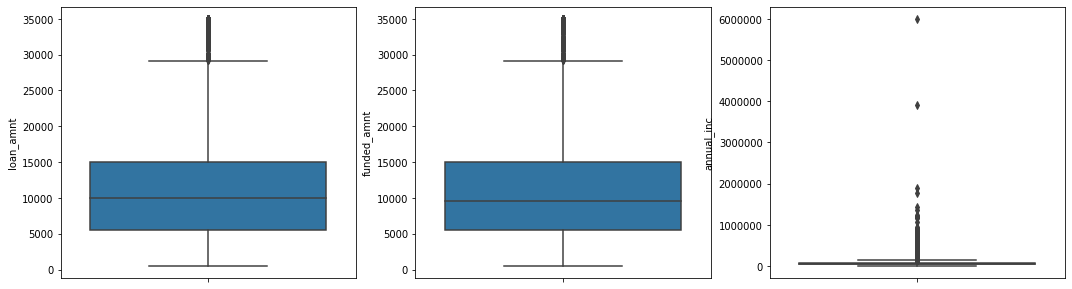

In [33]:
plt.figure(1, figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=loan_df_clean["loan_amnt"])
plt.subplot(1, 3, 2)
sns.boxplot(y=loan_df_clean["funded_amnt"])
plt.subplot(1, 3, 3)
sns.boxplot(y=loan_df_clean["annual_inc"])

In [34]:
def PercentageLossbyCutOffValue(dataframe, columnName, cutOff):
    print(
        len(dataframe[columnName].loc[loan_df_clean[columnName] > cutOff])
        / len(loan_df_clean)
        * 100
    )

In [35]:
def DropRowsByCutOffValue(dataframe, columnName, cutOffValue):
    return loan_df_clean.loc[loan_df_clean[columnName] < cutOffValue]

In [36]:
cutOffValue = 120000
column = "annual_inc"
PercentageLossbyCutOffValue(loan_df_clean, column, cutOffValue)

8.056002483981144


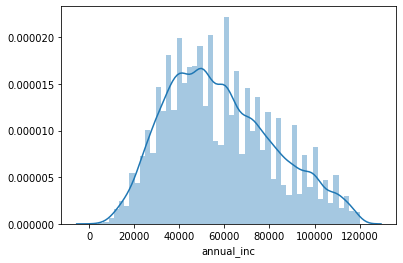

In [37]:
loan_df_clean = DropRowsByCutOffValue(loan_df_clean, column, cutOffValue)
# Plotting Frequency Plot
sns.distplot(loan_df_clean[column])

In [38]:
column = "loan_amnt"
cutOffValue = 25000
PercentageLossbyCutOffValue(loan_df_clean, column, cutOffValue)

2.7184224440919413


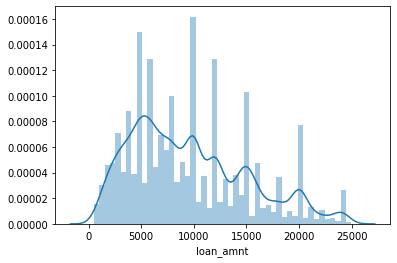

In [39]:
loan_df_clean = DropRowsByCutOffValue(loan_df_clean, column, cutOffValue)
# Plotting Frequency Plot
sns.distplot(loan_df_clean[column])

In [40]:
loan_df_clean.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_year,defaulter_rate
count,30427.000,30427.000,30427.000,30427.000,30427.000,30427.000,30427.000,30427.000,30427.000,30427.000
mean,9545.360,9378.798,9005.505,11.743,282.662,56950.476,13.589,0.044,2010.333,0.140
std,5512.667,5371.750,5325.667,3.575,161.780,23378.520,6.649,0.207,0.822,0.347
min,500.000,500.000,0.000,5.420,16.080,4000.000,0.000,0.000,2007.000,0.000
25%,5000.000,5000.000,4975.000,8.900,158.860,39900.000,8.510,0.000,2010.000,0.000
50%,8500.000,8400.000,8000.000,11.710,255.510,54000.000,13.740,0.000,2011.000,0.000
75%,13000.000,12600.000,12000.000,14.220,377.600,72000.000,18.880,0.000,2011.000,0.000
max,24975.000,24975.000,24950.000,24.400,902.540,119976.000,29.990,2.000,2011.000,1.000


In [41]:
len(loan_df_clean) / 36502 * 100

83.35707632458495

**After Outerlier Treatment, we are still left with 81 % of data**

**Now as we have sufficient information, now let's proceed with Univariant Analysis**

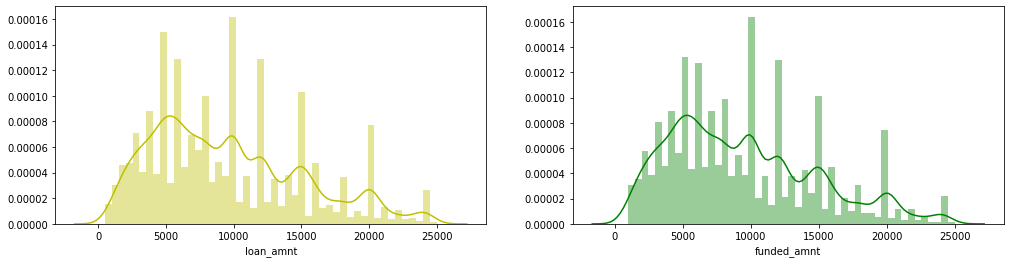

In [42]:
plt.figure(1, figsize=(17, 4))
plt.subplot(1, 2, 1)
sns.distplot(loan_df_clean["loan_amnt"], color="y")
plt.subplot(1, 2, 2)
sns.distplot(loan_df_clean["funded_amnt"], color="g")

These variables are similarly distributed, which shows that there is an adequate balance between loan and funding.

In [43]:
loan_df_clean.head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,pub_rec_bankruptcies,int_rate_interval,issue_month,issue_year,defaulter_rate,loan_amnt_interval,funded_amnt_inv_interval,funded_amnt_interval,annual_inc_interval,installment_interval,dti_interval
1,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,2011-12-01,Charged Off,car,bike,1.000,0.000,Very High,December,2011,1,LOW,LOW,LOW,LOW,LOW,LOW
3,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,2011-12-01,Fully Paid,other,personel,20.000,0.000,High,December,2011,0,HIGH,HIGH,HIGH,MEDIUM,HIGH,VERY HIGH
5,5000,5000,5000.000,36 months,7.900,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,11.200,0.000,Low,December,2011,0,LOW,LOW,LOW,LOW,MEDIUM,MEDIUM
6,7000,7000,7000.000,60 months,15.960,170.080,C,C5,Southern Star Photography,8 years,RENT,47004.000,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,23.510,0.000,Very High,December,2011,0,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,VERY HIGH


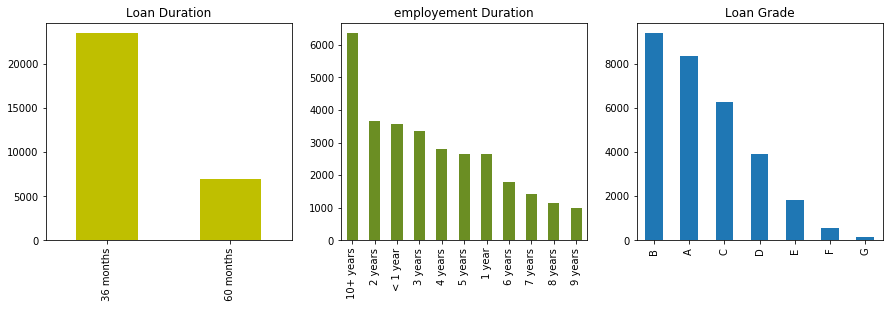

In [44]:
plt.figure(1, figsize=(15, 4))
plt.subplot(1, 3, 1)
loan_df_clean["term"].value_counts().plot("bar", title="Loan Duration", color="y")

plt.subplot(1, 3, 2)
loan_df_clean["emp_length"].value_counts().plot(
    "bar", title="employement Duration", color="olivedrab"
)

plt.subplot(1, 3, 3)
loan_df_clean["grade"].value_counts().plot("bar", title="Loan Grade")

**Inference :**
1. Most of the loan is taken for the duration of 3 year(36 month)
2. People who are being employed for more than 10 years are more likely to take loan
3. Most of loan is Given Grade between B, A & C respectively

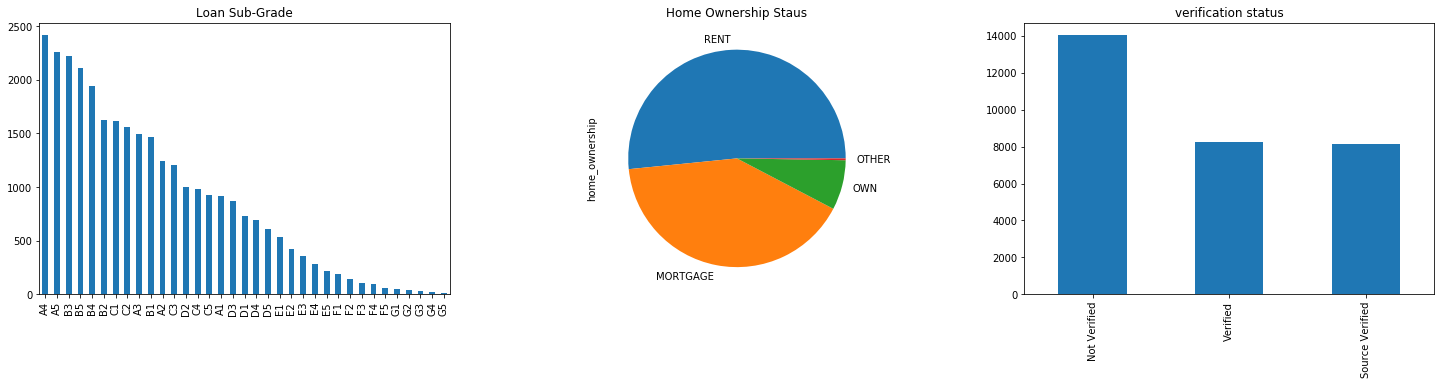

In [45]:
plt.figure(1, figsize=(25, 5))
plt.subplot(1, 3, 1)
loan_df_clean["sub_grade"].value_counts().plot("bar", title="Loan Sub-Grade")

plt.subplot(1, 3, 2)
loan_df_clean["home_ownership"].value_counts().plot("pie", title="Home Ownership Staus")

plt.subplot(1, 3, 3)
loan_df_clean["verification_status"].value_counts().plot(
    "bar", title="verification status"
)

**Inferences :**
1. People who are taking loan are having their Home Ownership as Rent or in Mortgage
2. Most of loan applications are not having their income source verified, this is worth looking into as it might lead to defaulter loan

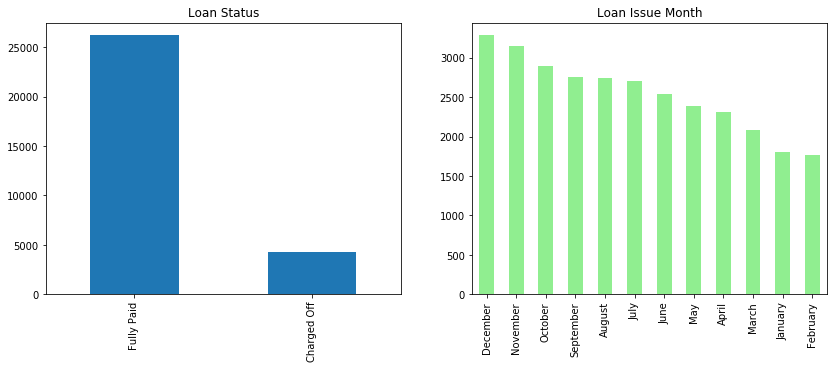

In [46]:
plt.figure(1, figsize=(14, 5))
plt.subplot(1, 2, 1)
loan_df_clean["loan_status"].value_counts().plot("bar", title="Loan Status")

plt.subplot(1, 2, 2)
loan_df_clean["issue_month"].value_counts().plot(
    "bar", title="Loan Issue Month", color="lightgreen"
)

**Inference :**
1. Loan Applications is increasing steadily from Jan to Dec
2. Most of the loan  are having status Fully Paid but there are still considerable amount of loan application that are in Charged off state, we need to look into it.

## Segment Univariant Analysis EDA :

grade
G   0.421
F   0.305
E   0.262
D   0.216
C   0.168
B   0.121
A   0.060
Name: defaulter_rate, dtype: float64


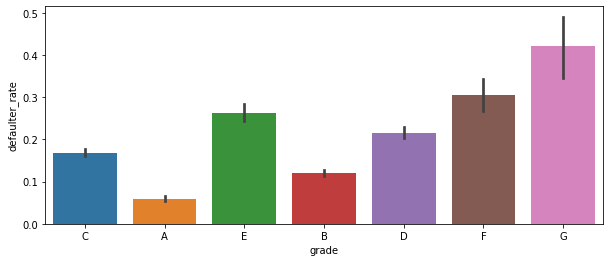

In [47]:
plt.figure(figsize=(10, 4))
print(
    loan_df_clean.groupby(by=["grade"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["grade"], y=loan_df_clean["defaulter_rate"])

sub_grade
G3   0.556
G2   0.475
F5   0.473
G5   0.438
G1   0.377
F4   0.304
E4   0.298
F2   0.290
E5   0.290
F1   0.284
F3   0.276
G4   0.261
E2   0.261
E1   0.254
D5   0.250
D4   0.245
E3   0.231
D3   0.216
D2   0.210
C5   0.183
C3   0.180
C4   0.171
D1   0.168
C2   0.165
C1   0.153
B5   0.139
B4   0.133
B3   0.121
B2   0.106
B1   0.094
A5   0.084
A4   0.061
A3   0.050
A2   0.050
A1   0.025
Name: defaulter_rate, dtype: float64


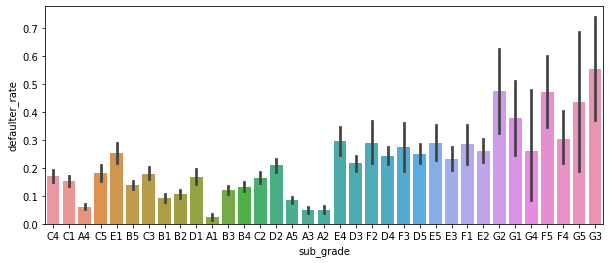

In [48]:
plt.figure(figsize=(10, 4))
print(
    loan_df_clean.groupby(by=["sub_grade"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["sub_grade"], y=loan_df_clean["defaulter_rate"])

loan_amnt_interval
VERY HIGH   0.167
LOW         0.135
HIGH        0.129
MEDIUM      0.125
Name: defaulter_rate, dtype: float64


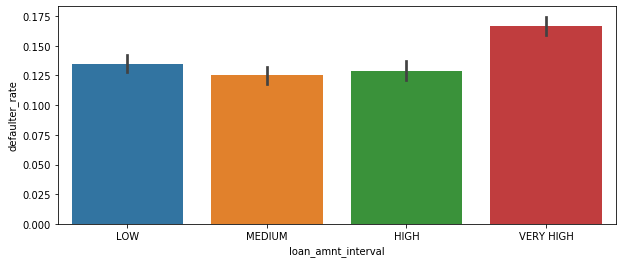

In [49]:
plt.figure(figsize=(10, 4))
print(
    loan_df_clean.groupby(by=["loan_amnt_interval"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["loan_amnt_interval"], y=loan_df_clean["defaulter_rate"])

funded_amnt_interval
VERY HIGH   0.166
LOW         0.135
HIGH        0.131
MEDIUM      0.124
Name: defaulter_rate, dtype: float64


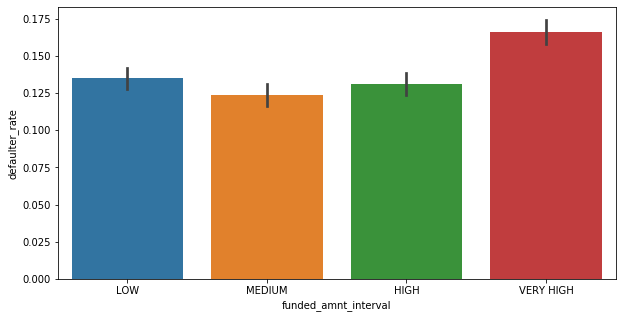

In [50]:
plt.figure(figsize=(10, 5))
print(
    loan_df_clean.groupby(by=["funded_amnt_interval"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["funded_amnt_interval"], y=loan_df_clean["defaulter_rate"])

int_rate_interval
Very High   0.236
High        0.148
Medium      0.103
Low         0.059
Name: defaulter_rate, dtype: float64


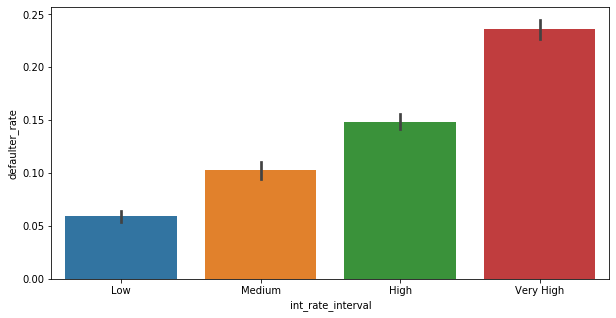

In [51]:
plt.figure(figsize=(10, 5))
print(
    loan_df_clean.groupby(by=["int_rate_interval"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["int_rate_interval"], y=loan_df_clean["defaulter_rate"])

purpose
small_business       0.266
renewable_energy     0.192
educational          0.168
moving               0.159
other                0.157
house                0.157
medical              0.156
vacation             0.153
debt_consolidation   0.147
home_improvement     0.117
car                  0.110
credit_card          0.102
major_purchase       0.100
wedding              0.099
Name: defaulter_rate, dtype: float64


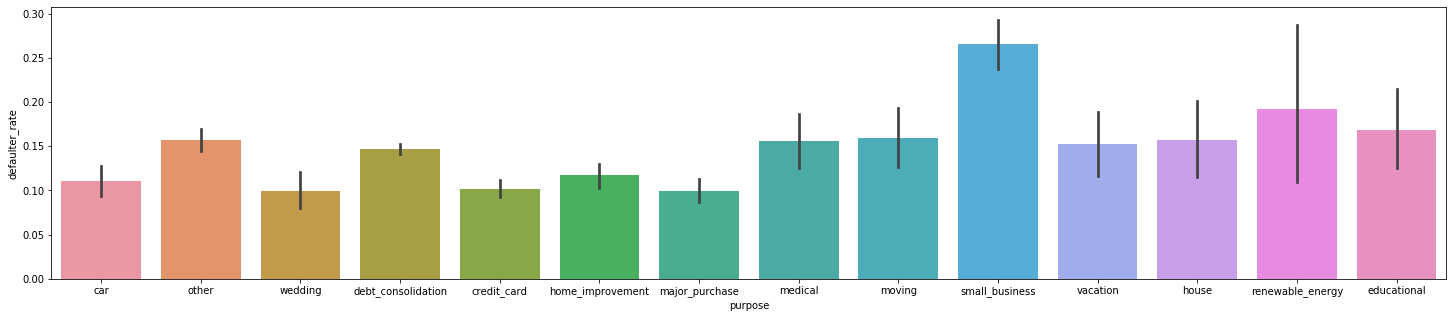

In [52]:
plt.figure(figsize=(25, 5))
print(
    loan_df_clean.groupby(by=["purpose"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["purpose"], y=loan_df_clean["defaulter_rate"])

emp_length
7 years     0.151
10+ years   0.150
1 year      0.142
6 years     0.139
5 years     0.139
3 years     0.138
8 years     0.137
4 years     0.135
< 1 year    0.134
2 years     0.131
9 years     0.125
Name: defaulter_rate, dtype: float64


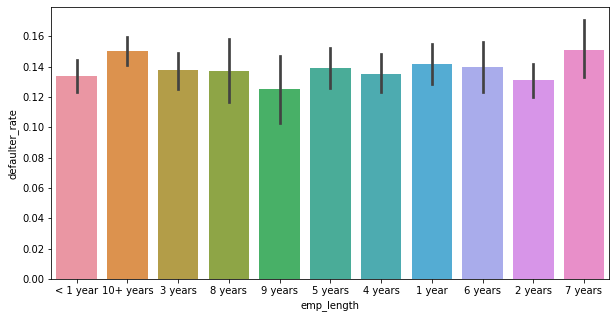

In [53]:
plt.figure(figsize=(10, 5))
print(
    loan_df_clean.groupby(by=["emp_length"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["emp_length"], y=loan_df_clean["defaulter_rate"])

annual_inc_interval
LOW         0.175
MEDIUM      0.145
HIGH        0.135
VERY HIGH   0.102
Name: defaulter_rate, dtype: float64


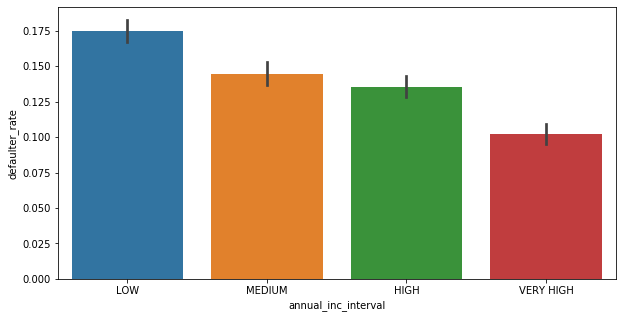

In [54]:
plt.figure(figsize=(10, 5))
print(
    loan_df_clean.groupby(by=["annual_inc_interval"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["annual_inc_interval"], y=loan_df_clean["defaulter_rate"])

home_ownership
OTHER      0.195
RENT       0.148
OWN        0.139
MORTGAGE   0.129
Name: defaulter_rate, dtype: float64


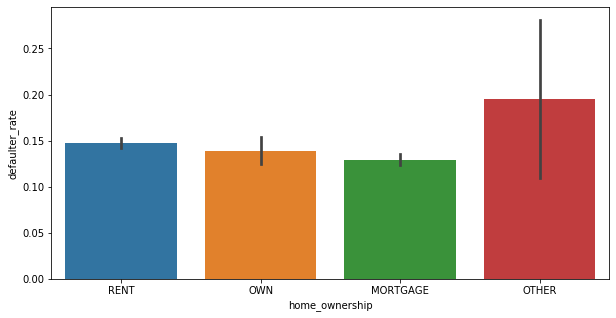

In [55]:
plt.figure(figsize=(10, 5))
print(
    loan_df_clean.groupby(by=["home_ownership"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["home_ownership"], y=loan_df_clean["defaulter_rate"])

verification_status
Verified          0.162
Source Verified   0.146
Not Verified      0.122
Name: defaulter_rate, dtype: float64


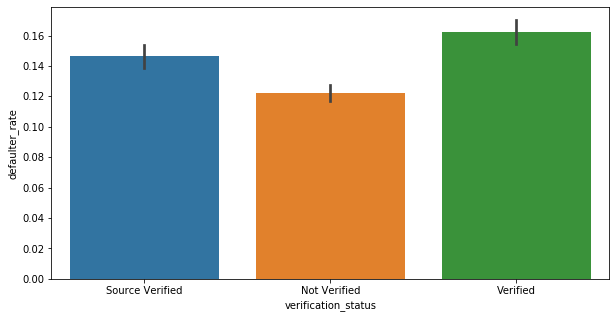

In [56]:
plt.figure(figsize=(10, 5))
print(
    loan_df_clean.groupby(by=["verification_status"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["verification_status"], y=loan_df_clean["defaulter_rate"])

pub_rec_bankruptcies
2.000   0.400
1.000   0.213
0.000   0.136
Name: defaulter_rate, dtype: float64


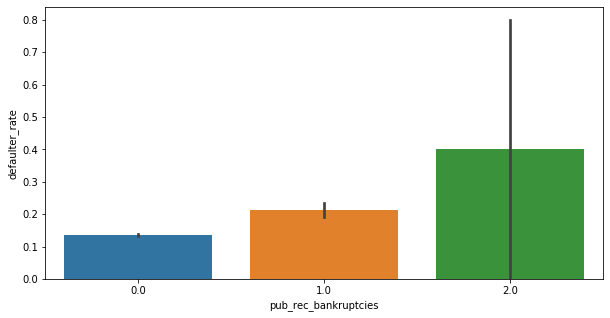

In [57]:
plt.figure(figsize=(10, 5))
print(
    loan_df_clean.groupby(by=["pub_rec_bankruptcies"])["defaulter_rate"]
    .mean()
    .sort_values(ascending=False)
)
sns.barplot(x=loan_df_clean["pub_rec_bankruptcies"], y=loan_df_clean["defaulter_rate"])

**Inferences**
1. Defaulter Rate is higher when grade is G & F.
2. If Funded amount is VERY HIGH then there's 16% chance of defaulter loan
3. Higher the interest rate, higher the risk of applicant being defaulter
4. In Case of Purpose, default rate is higher for small business, renewable_energy & education
5. Mostly the experiensed employees are more likely to being defaulter
6. If Applicant Income is within range of LOW-MEDIUM then there's increasing defaulter rate
7. for Home_ownershipe : Defaulter rate is higher for applicant specifying as other]
8. In Case Of verification_status : suprisingly defaulter rate is higher for applicants having their income verified
9. In case of pub_rec_bankruptcies : if record is 2 then defaulter rate is maximum, we should not provide loan to such risky applicants

Now Let's continue Analysis with more than two categorical and Quantitative Variables using Bivariant Analysis

## Bivariant Analysis:

Correlation of Defaulter_rate with Other Variables :


defaulter_rate          1.000
int_rate                0.208
pub_rec_bankruptcies    0.046
loan_amnt               0.043
funded_amnt             0.043
dti                     0.038
funded_amnt_inv         0.031
issue_year              0.030
installment             0.009
annual_inc             -0.081
Name: defaulter_rate, dtype: float64

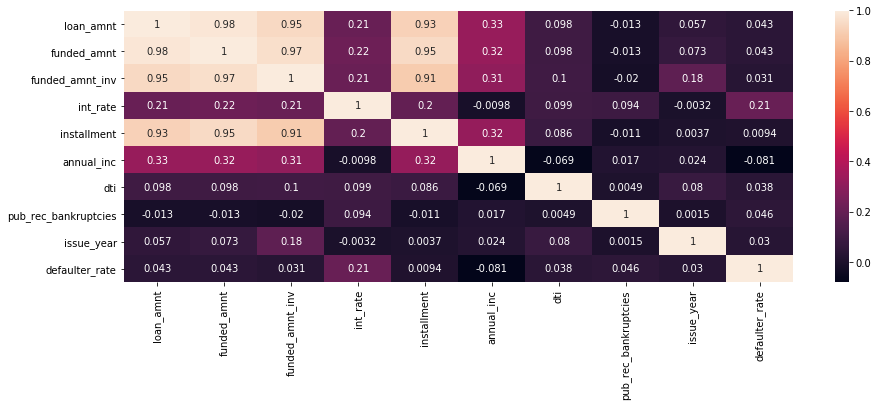

In [58]:
plt.figure(1, figsize=(15, 5))
sns.heatmap(loan_df_clean.corr(), annot=True)

print("Correlation of Defaulter_rate with Other Variables :")
loan_df_clean.corr()["defaulter_rate"].sort_values(ascending=False)

Defaulter Rate is having 20% correlation with Interest rate.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

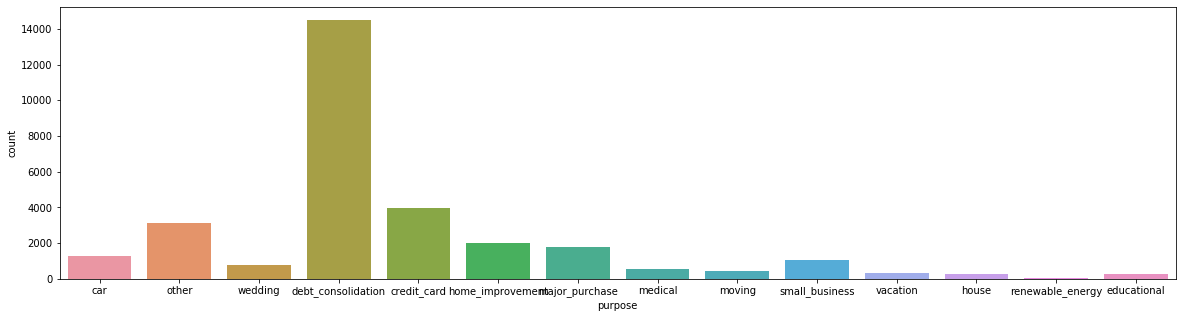

In [59]:
plt.figure(1, figsize=(20, 5))
sns.countplot(loan_df_clean["purpose"])

Major loan purpose based on frequency as well as the defaulter rate with respect to loan-purpose will be : small_business, educational,debt_consolidation, credit_card,home_improvement

In [60]:
# filterling loan-purpose
main_purpose = [
    "small_business",
    "educational",
    "debt_consolidation",
    "credit_card",
    "home_improvement",
]
loan_df_clean = loan_df_clean.loc[loan_df_clean["purpose"].isin(main_purpose)]

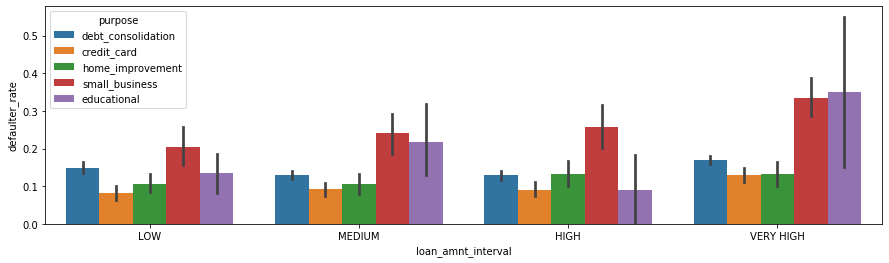

In [61]:
plt.figure(1, figsize=(15, 4))
sns.barplot(
    x=loan_df_clean["loan_amnt_interval"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

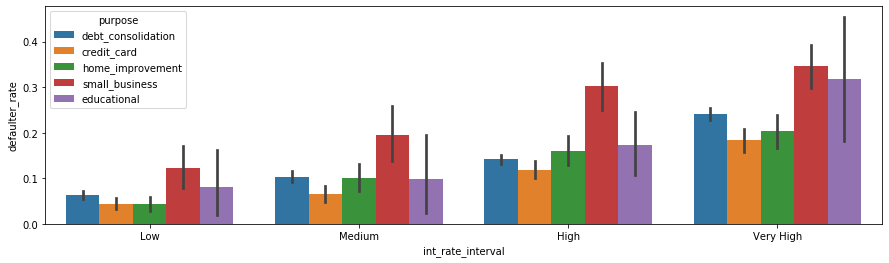

In [62]:
plt.figure(1, figsize=(15, 4))
sns.barplot(
    x=loan_df_clean["int_rate_interval"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

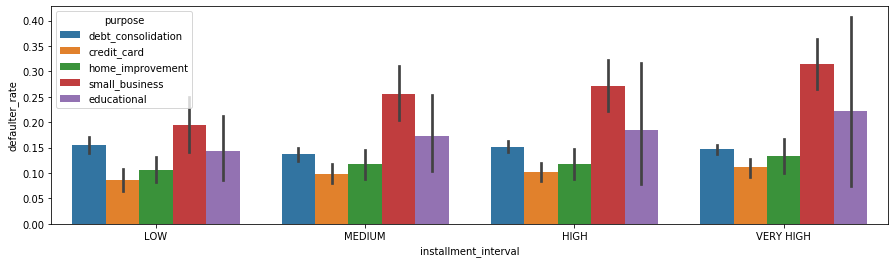

In [63]:
plt.figure(1, figsize=(15, 4))
sns.barplot(
    x=loan_df_clean["installment_interval"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

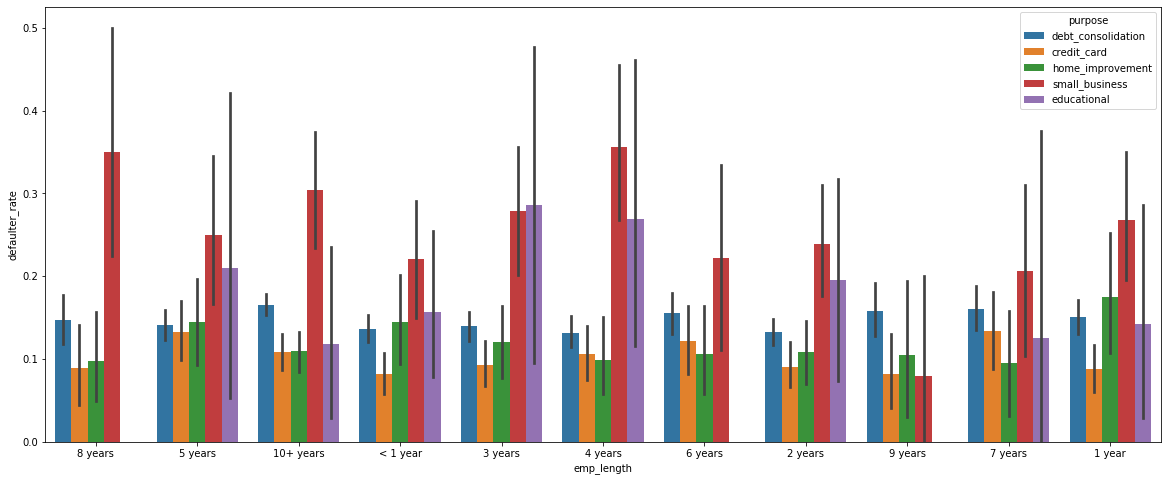

In [64]:
plt.figure(1, figsize=(20, 8))
sns.barplot(
    x=loan_df_clean["emp_length"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

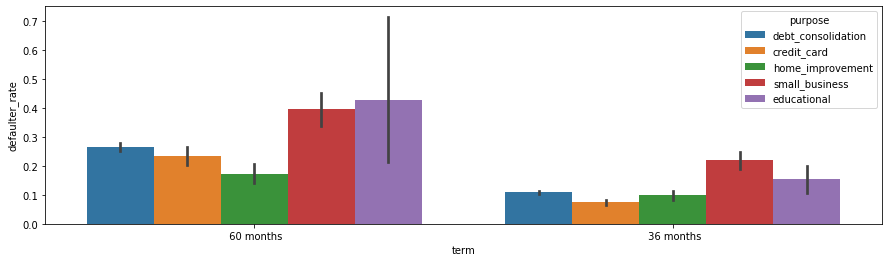

In [65]:
plt.figure(1, figsize=(15, 4))
sns.barplot(
    x=loan_df_clean["term"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

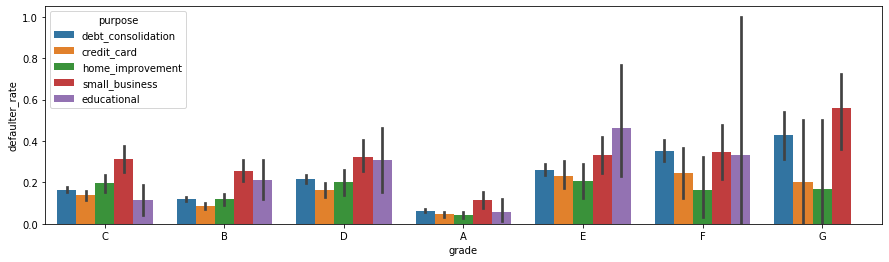

In [66]:
plt.figure(1, figsize=(15, 4))
sns.barplot(
    x=loan_df_clean["grade"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

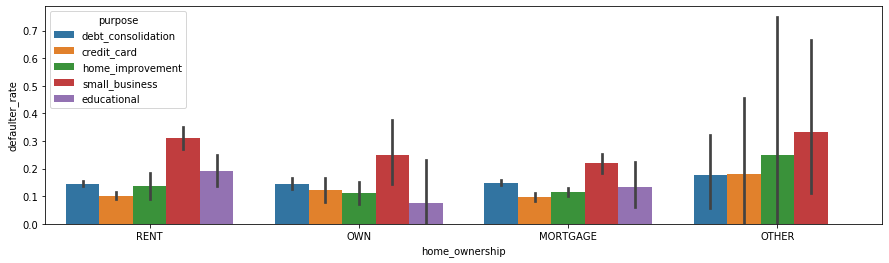

In [67]:
plt.figure(1, figsize=(15, 4))
sns.barplot(
    x=loan_df_clean["home_ownership"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

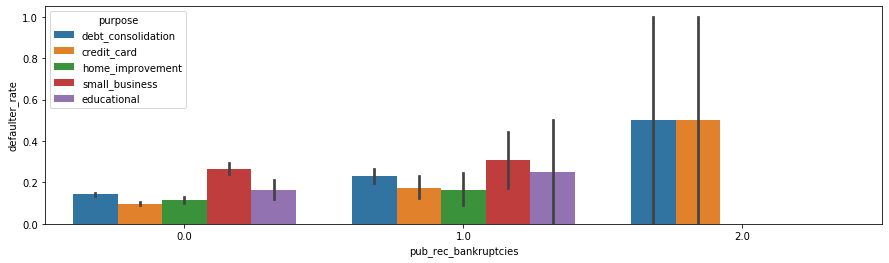

In [68]:
plt.figure(1, figsize=(15, 4))
sns.barplot(
    x=loan_df_clean["pub_rec_bankruptcies"],
    y=loan_df_clean["defaulter_rate"],
    hue=loan_df_clean["purpose"],
)

In [69]:
def getdefaultRate(cat_col):
    default_df = (
        loan_df_clean.groupby(by=[cat_col])["defaulter_rate"]
        .mean()
        .sort_values(ascending=False)
    )
    diff = (default_df[0] - default_df[-1]) * 100
    return [cat_col, diff]

In [70]:
defaultrateList = []
cat_df = loan_df_clean.select_dtypes(["object", "category"])

for col in cat_df.columns.tolist():
    if col not in ["emp_title", "loan_status", "title"]:
        defaultrateList.append(getdefaultRate(col))

# Convert To Dataframe
default_rate_df = pd.DataFrame(defaultrateList, columns=["variable", "default_rate"])

default_rate_df.sort_values(by=["default_rate"], ascending=False)

,variable,default_rate
2,sub_grade,57.710
1,grade,36.060
6,purpose,16.434
0,term,15.224
12,annual_inc_interval,7.149
4,home_ownership,5.885
8,issue_month,5.678
5,verification_status,4.464
3,emp_length,2.307
10,funded_amnt_inv_interval,1.972


**Inference & Recommendation**

1. Default_rate is having 20% correlation with interest rate, applicant with high loan amount with high interest rate is more likely to be default
2. Applicants having High & VERY HIGH Loan Amount for Education, small business and home improvement purpose are having higher default_rate
3. Interest rate is another driver variable here, High & VERY HIGH interest rate are having more default_rate if loan_purpose is  Education & small business
4. In case of loan term - long term loan for Education purpose having likely more chances to be defaulter